**Home work 6**

In this exercise we will perform cross-validation on a simulated data set.  (5 pts)      

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm 

%matplotlib inline


(a) Follow the below steps and generate $y$ from $x$ and $\epsilon$.

* Using the random.normal() function, create a vector,  𝑥 , containing 100 observations drawn from a N(0, 1) distribution. 

* Using the random.normal() function, create a vector, $\epsilon$, containing 100 observations drawn from a N(0, 1) distribution i.e. a normal distribution with mean zero and variance 1.

* Using $x$ and $\epsilon$, generate a vector $y$ according to the model

$Y = x - 2x^2+ \epsilon$ 

In [3]:
np.random.seed(0)

x = np.random.normal(0,1,100)
print(x)

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
  0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
  1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
 -1.70627019  1.9507754  -0.50965218 -0.4380743  -1.25279536  0.77749036
 -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
 -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
 -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
 -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
  1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
 -0.31155253  0.05616534 -1.16514984  0.90082649  0

In [4]:
eps = np.random.normal(0, np.sqrt(0.25), 100)
print(eps)

[ 0.94157535 -0.67387953 -0.6352425   0.48469835 -0.5865617   0.97181059
 -0.20680949 -0.37372741  0.96147101  0.7402574   0.93377948  0.45302233
 -0.43061284  0.95503248 -0.13400169  0.4012282   0.47362598 -0.07750505
  0.30703969  0.46110334  0.18821277 -0.5497004   0.14911909  0.66319295
 -0.34728393 -0.07481727 -0.21757678  0.92463186  0.33614738  0.20373092
 -0.38495804  0.2696246  -0.33716633  0.01591528 -0.31792304  0.33821665
  0.28829541 -0.10414938  0.19800336 -0.54653075 -0.7456288   0.21969585
  0.08333675  0.31751572  1.19157239  0.47223974 -0.45641111  0.55850814
 -0.65795371 -0.2307923  -0.0341208   0.85667136 -0.37237741 -0.41321927
 -0.04922626 -0.33173914  0.56331796 -0.53996575 -0.57373433 -0.21891002
 -0.24901623  0.96476603  0.4747104   0.04377562 -0.61271776  0.42218149
 -0.50010767 -0.77238555  0.5940149   0.15847131  0.46042941  0.15936383
  0.42841531 -0.3255128  -0.51712142  0.34079726 -0.40170483 -0.34477489
 -0.22776625  0.00873958 -0.17699696 -0.68747565 -0

In [5]:
y = x - 2 * x**2 + eps
print(y)

[ -3.51813366  -0.59397391  -1.5723606   -7.31761311  -5.69454941
  -1.9156114   -1.06205708  -0.57090262   0.8369439    0.81367364
   1.03632595  -2.32252703  -0.82793196   1.04709787  -0.08416759
   0.51222541  -2.4968395   -0.36684314   0.42408462  -1.85195147
 -15.40029105  -0.75051634  -0.4809446   -1.18058991  -8.38110141
  -5.75954198  -0.17600594   0.66737243  -2.82989765  -2.6449407
  -0.27802802   0.36177333  -2.80127915  -9.81199049  -0.90792092
   0.44567562  -1.50864423  -1.79320413  -0.48936759  -1.03160741
  -3.9931084   -5.23322397  -7.44564937  -5.34275817   0.16242951
  -0.34965275  -4.8481989    0.12701599  -7.48118408  -0.53404944
  -2.53330809   0.94418677  -1.40502633  -4.38163616  -0.07899697
  -0.27034366   0.6209861   -0.42047235  -2.01278546  -0.8448135
  -1.82588278   0.34665591  -1.66084963  -7.64261023  -0.49825169
  -0.30245529  -7.44539932  -0.73793812  -1.95966411   0.20502005
   0.12637388   0.25507355  -1.02865185  -4.60992823  -0.43853737
  -1.2819425

(b) Plot the scatter plot between $x$ and $y$.

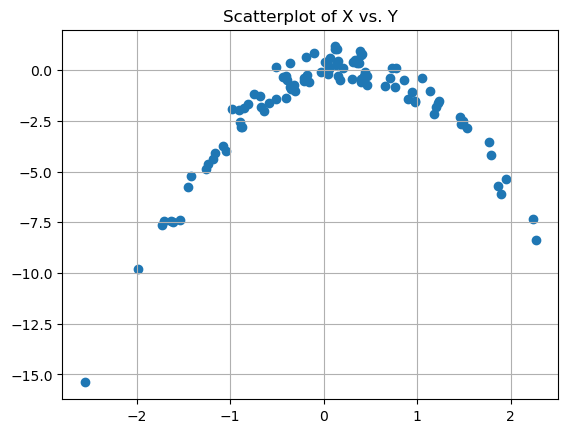

In [6]:
plt.scatter(x, y)
plt.title('Scatterplot of X vs. Y')
plt.grid(True)
plt.show()

(c) Compute the Leave One Out Cross-Validation errors using Mean squared error (MSE) that result from fitting the following four models using least squares:

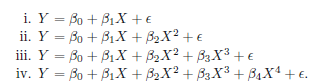

I tried two different ways as following:

##### 1. Use *LeaveOneOut()* , do the loop mannually:

In [58]:
import seaborn as sns

degree = [1, 2, 3, 4]

for i in degree:
    features = PolynomialFeatures(i, include_bias=False)
    x_poly = features.fit_transform(x.reshape(-1, 1))
    x_poly = sm.add_constant(x_poly)
    
    lr = LinearRegression()
    loo = LeaveOneOut()
    #mse_values = np.zeros(4)
    mse_loo = []

    
    for train_index, test_index in loo.split(x_poly):
        x_train, x_test = x_poly[train_index], x_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]

        lr.fit(x_train, y_train)

        y_pred = lr.predict(x_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_loo.append(mse)
    
    print("For degree:", i, ", Average MSE:", np.mean(mse_loo))


For degree: 1 , Average MSE: 7.834884516209479
For degree: 2 , Average MSE: 0.2790382972443173
For degree: 3 , Average MSE: 0.2905564700975805
For degree: 4 , Average MSE: 0.2867869857522854


##### 2. Use *cross_val_score()* with *cv=LeaveOneOut()*:

For degree: 1 , Average MSE: 7.834884516209479
For degree: 2 , Average MSE: 0.2790382972443173
For degree: 3 , Average MSE: 0.2905564700975805
For degree: 4 , Average MSE: 0.2867869857522854


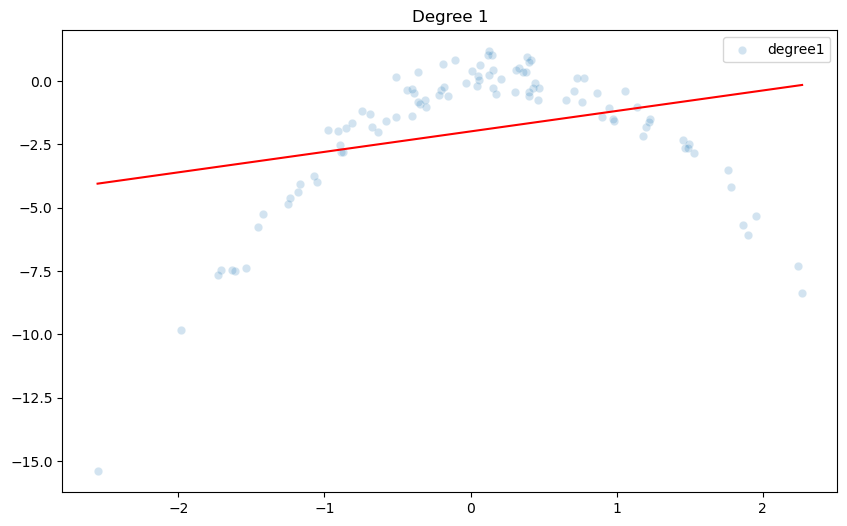

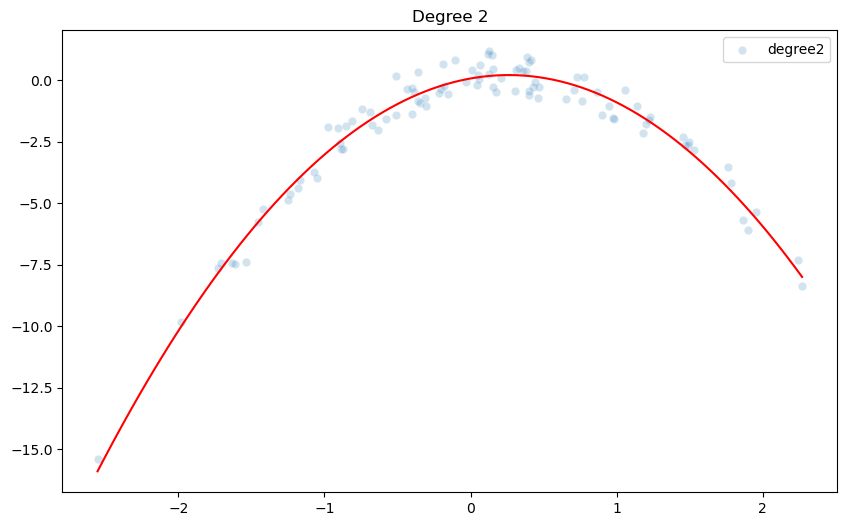

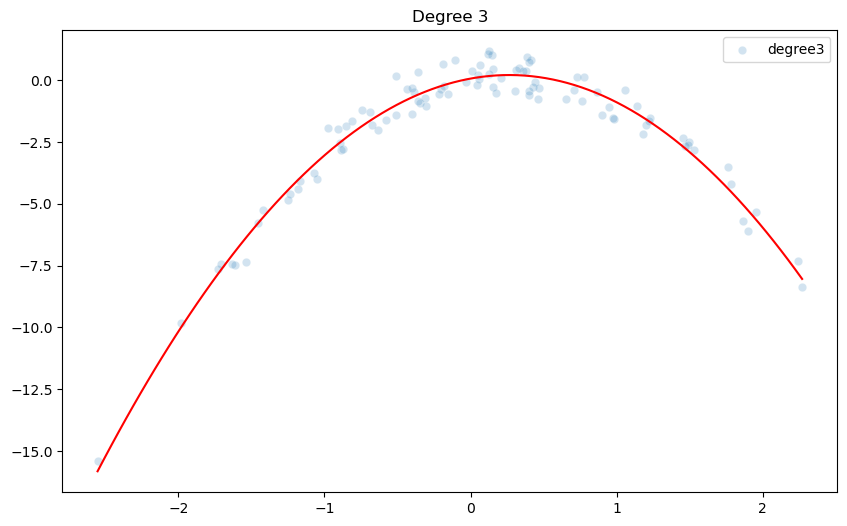

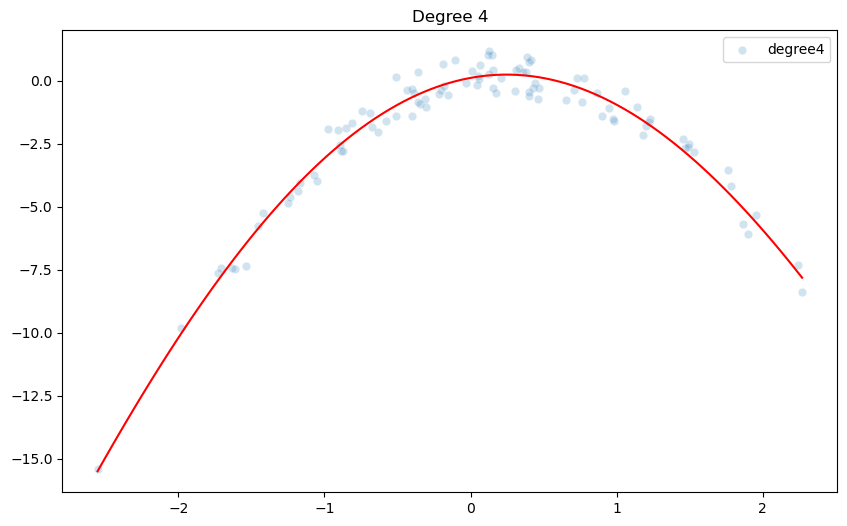

In [65]:
from sklearn.model_selection import cross_val_score
import seaborn as sns

degree = [1, 2, 3, 4]

for i in degree:
    features = PolynomialFeatures(i, include_bias=False)
    x_poly = features.fit_transform(x.reshape(-1, 1))
    x_poly = sm.add_constant(x_poly)
    
    loo = LeaveOneOut()
    lr = LinearRegression()
    lr.fit(x_poly, y)
    
    nmse_scores = cross_val_score(lr, x_poly, y, scoring='neg_mean_squared_error', cv=loo, n_jobs=-1)
    pmse_scores = np.absolute(nmse_scores)
    mse = np.mean(pmse_scores)
    
    print("For degree:", i, ", Average MSE:", mse)
    
    X_plot = np.linspace(min(x),max(x),100)
    X_plot_poly = features.fit_transform(X_plot.reshape(-1,1))
    X_plot_poly = sm.add_constant(X_plot_poly)
    preds_test = lr.predict(X_plot_poly)

    plt.figure(figsize = (10,6))
    sns.scatterplot(x=x,y=y,alpha = 0.2,label = 'degree' + str(i))
    sns.lineplot(x=X_plot,y=preds_test,color = 'r')
    plt.title('Degree ' + str(i))

(d)  What is the model with the smallest LOOCV error

The model of degree 2 has the lowest LOOCV error.

(e) Observe the statistical significance of the coefficient estimates that results from fitting each of the models above using
least squares.

In [14]:
degree = [1, 2, 3, 4]

for i in degree:
    features = PolynomialFeatures(i, include_bias=False)
    x_poly = features.fit_transform(x.reshape(-1, 1))
    x_poly = sm.add_constant(x_poly)

    OSI = sm.OLS(y, x_poly).fit()
    
    print("For degree:", i, ", Summary:")
    print(OSI.summary())
    print('--------------------------------------------------')

For degree: 1 , Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     9.044
Date:                Sat, 12 Oct 2024   Prob (F-statistic):            0.00335
Time:                        22:35:45   Log-Likelihood:                -240.47
No. Observations:                 100   AIC:                             484.9
Df Residuals:                      98   BIC:                             490.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9863      

(f) Observe the t-statistic values

##### Model of degree 1
- const: -7.325
- x1: 3.007

##### Model of degree 2
- const: 1.079
- x1: 20.473
- x2: -50.570

##### Model of degree 3
- const: 1.077
- x1: 11.114
- x2: -50.324
- x3: -0.240

##### Model of degree 4
- const: 1.563
- x1: 10.770
- x2: -20.336
- x3: 0.078
- x4: 1.248

(g) Implement Ridge Regression using k-fold cross-validation on the models with higher-degree polynomials i.e., iii and iv in (c) and compare its performance to the linear regression.

For degree:  3
k =  2 , Average mse(Ridge) =  0.3128342596629994
k =  3 , Average mse(Ridge) =  0.2926121382871715
k =  4 , Average mse(Ridge) =  0.2786312260476984
k =  5 , Average mse(Ridge) =  0.3177934197639714
k =  6 , Average mse(Ridge) =  0.3055286624601248
k =  7 , Average mse(Ridge) =  0.2881713339634447
k =  8 , Average mse(Ridge) =  0.291932514130395
k =  9 , Average mse(Ridge) =  0.2848008909822768
k =  10 , Average mse(Ridge) =  0.2919193252609461
k =  11 , Average mse(Ridge) =  0.29072126740754883
k =  12 , Average mse(Ridge) =  0.29348042147037956
k =  13 , Average mse(Ridge) =  0.2910257547319033
k =  14 , Average mse(Ridge) =  0.28748306263043516
k =  15 , Average mse(Ridge) =  0.2918767823595093
k =  16 , Average mse(Ridge) =  0.289231987931789
k =  17 , Average mse(Ridge) =  0.2891102770685301
k =  18 , Average mse(Ridge) =  0.2886254437883349
k =  19 , Average mse(Ridge) =  0.2838868760518299
k =  20 , Average mse(Ridge) =  0.29283605568838594
k =  21 , Average mse(

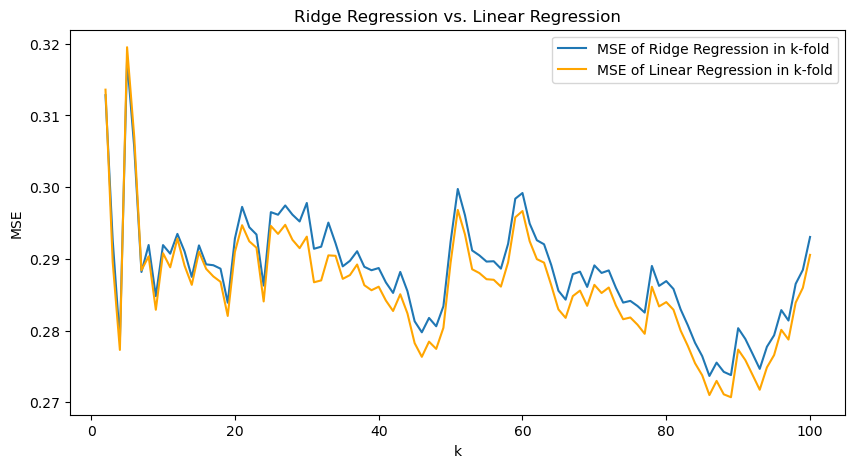

For degree:  4
k =  2 , Average mse(Ridge) =  0.3289831508793524
k =  3 , Average mse(Ridge) =  0.2742717681535214
k =  4 , Average mse(Ridge) =  0.2731086467585204
k =  5 , Average mse(Ridge) =  0.2921314007170908
k =  6 , Average mse(Ridge) =  0.2810243533994814
k =  7 , Average mse(Ridge) =  0.278355737982423
k =  8 , Average mse(Ridge) =  0.27822829976361724
k =  9 , Average mse(Ridge) =  0.27963066840899753
k =  10 , Average mse(Ridge) =  0.2782360312366075
k =  11 , Average mse(Ridge) =  0.2780838992006203
k =  12 , Average mse(Ridge) =  0.2816913468198485
k =  13 , Average mse(Ridge) =  0.281960273338214
k =  14 , Average mse(Ridge) =  0.279176391300253
k =  15 , Average mse(Ridge) =  0.28321966749553984
k =  16 , Average mse(Ridge) =  0.2812960223900053
k =  17 , Average mse(Ridge) =  0.2814882645029921
k =  18 , Average mse(Ridge) =  0.2810695471412957
k =  19 , Average mse(Ridge) =  0.276688508084925
k =  20 , Average mse(Ridge) =  0.2776895391191605
k =  21 , Average mse(Rid

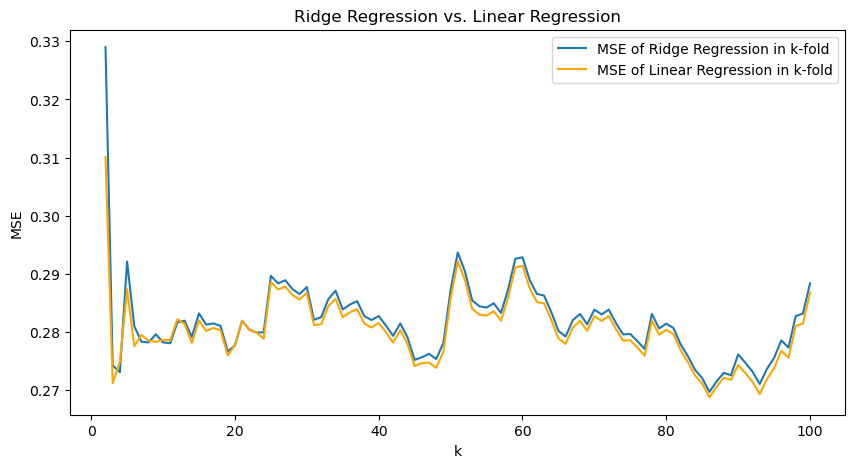

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV

degree = [3, 4]

for i in degree:
    print('For degree: ', i)
    
    features = PolynomialFeatures(i, include_bias=False)
    x_poly = features.fit_transform(x.reshape(-1, 1))
    x_poly = sm.add_constant(x_poly)
    
    Ridge = RidgeCV()
    Ridge.fit(x_poly, y)
    
    lr = LinearRegression()
    lr.fit(x_poly, y)
    
    k_list = np.arange(2, 101)
    mse_r = np.zeros(99)
    mse_lr = np.zeros(99)
    
    for k in range(2, 101):
        nmse_scores_r = cross_val_score(Ridge, x_poly, y, scoring='neg_mean_squared_error', cv=k, n_jobs=-1)
        pmse_scores_r = np.absolute(nmse_scores_r)
        mse_r[k-2] = np.mean(pmse_scores_r)
        print('k = ', k, ', Average mse(Ridge) = ', mse_r[k-2])
        
        nmse_scores_lr = cross_val_score(lr, x_poly, y, scoring='neg_mean_squared_error', cv=k, n_jobs=-1)
        pmse_scores_lr = np.absolute(nmse_scores_lr)
        mse_lr[k-2] = np.mean(pmse_scores_lr)
        
    print('-----------------------------------')
    
    plt.figure(figsize=(10, 5))
    plt.plot(k_list, mse_r, label="MSE of Ridge Regression in k-fold")
    plt.plot(k_list, mse_lr, label="MSE of Linear Regression in k-fold",  color='orange')
    plt.xlabel('k')
    plt.ylabel('MSE')
    plt.title('Ridge Regression vs. Linear Regression')
    plt.legend()

    plt.show()

### Conclusion

#### Degree 3:
In the first few folds, Ridge Regression has similar performance as Linear Regression. Ridge Regression performs better than Linear Regression, as it minimizes the MSE more consistently across different folds of the cross-validation. 

#### Degree 4:
Ridge Regression has a better performance in the first few folds. Although Linear Regression may be better in some special folds(around k=8), it has a larger MSE when there are more folds.

(h) Implement Lasso Regression using k-fold cross-validation on the models with higher-degree polynomials i.e., iii and iv in (c) and compare its performance to the linear regression.

For degree:  3
k =  2 , Average mse(Lasso) =  0.3128342596629994
k =  3 , Average mse(Lasso) =  0.2926121382871715
k =  4 , Average mse(Lasso) =  0.2786312260476984
k =  5 , Average mse(Lasso) =  0.3177934197639714
k =  6 , Average mse(Lasso) =  0.3055286624601248
k =  7 , Average mse(Lasso) =  0.2881713339634447
k =  8 , Average mse(Lasso) =  0.291932514130395
k =  9 , Average mse(Lasso) =  0.2848008909822768
k =  10 , Average mse(Lasso) =  0.2919193252609461
k =  11 , Average mse(Lasso) =  0.29072126740754883
k =  12 , Average mse(Lasso) =  0.29348042147037956
k =  13 , Average mse(Lasso) =  0.2910257547319033
k =  14 , Average mse(Lasso) =  0.28748306263043516
k =  15 , Average mse(Lasso) =  0.2918767823595093
k =  16 , Average mse(Lasso) =  0.289231987931789
k =  17 , Average mse(Lasso) =  0.2891102770685301
k =  18 , Average mse(Lasso) =  0.2886254437883349
k =  19 , Average mse(Lasso) =  0.2838868760518299
k =  20 , Average mse(Lasso) =  0.29283605568838594
k =  21 , Average mse(

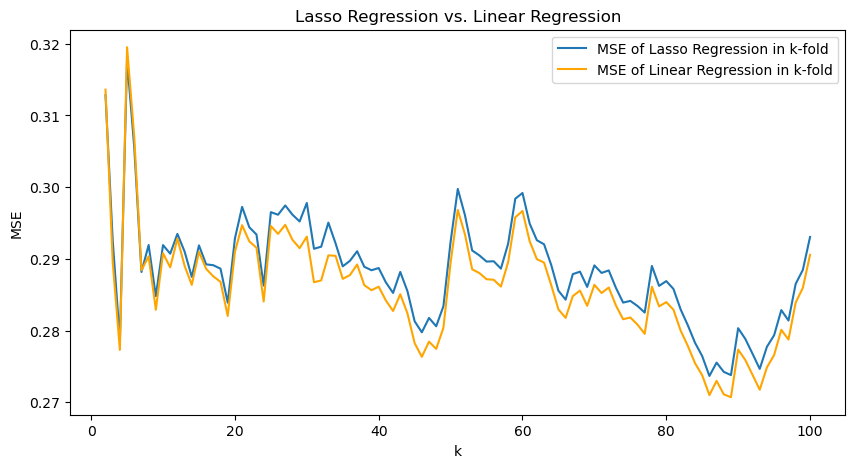

For degree:  4
k =  2 , Average mse(Lasso) =  0.3289831508793524
k =  3 , Average mse(Lasso) =  0.2742717681535214
k =  4 , Average mse(Lasso) =  0.2731086467585204
k =  5 , Average mse(Lasso) =  0.2921314007170908
k =  6 , Average mse(Lasso) =  0.2810243533994814
k =  7 , Average mse(Lasso) =  0.278355737982423
k =  8 , Average mse(Lasso) =  0.27822829976361724
k =  9 , Average mse(Lasso) =  0.27963066840899753
k =  10 , Average mse(Lasso) =  0.2782360312366075
k =  11 , Average mse(Lasso) =  0.2780838992006203
k =  12 , Average mse(Lasso) =  0.2816913468198485
k =  13 , Average mse(Lasso) =  0.281960273338214
k =  14 , Average mse(Lasso) =  0.279176391300253
k =  15 , Average mse(Lasso) =  0.28321966749553984
k =  16 , Average mse(Lasso) =  0.2812960223900053
k =  17 , Average mse(Lasso) =  0.2814882645029921
k =  18 , Average mse(Lasso) =  0.2810695471412957
k =  19 , Average mse(Lasso) =  0.276688508084925
k =  20 , Average mse(Lasso) =  0.2776895391191605
k =  21 , Average mse(Las

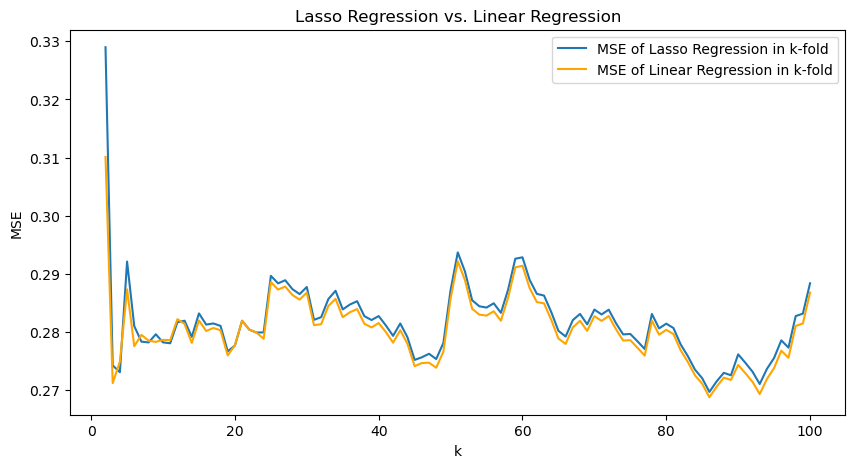

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV

degree = [3, 4]

for i in degree:
    print('For degree: ', i)
    
    features = PolynomialFeatures(i, include_bias=False)
    x_poly = features.fit_transform(x.reshape(-1, 1))
    x_poly = sm.add_constant(x_poly)
    
    Lasso = LassoCV()
    Lasso.fit(x_poly, y)
    
    Ridge = RidgeCV()
    Ridge.fit(x_poly, y)
    
    lr = LinearRegression()
    lr.fit(x_poly, y)
    
    k_list = np.arange(2, 101)
    mse_l = np.zeros(99)
    mse_r = np.zeros(99)
    mse_lr = np.zeros(99)
    
    for k in range(2, 101):
        nmse_scores_l = cross_val_score(Ridge, x_poly, y, scoring='neg_mean_squared_error', cv=k, n_jobs=-1)
        pmse_scores_l = np.absolute(nmse_scores_l)
        mse_l[k-2] = np.mean(pmse_scores_l)
        print('k = ', k, ', Average mse(Lasso) = ', mse_l[k-2])
        
        nmse_scores_r = cross_val_score(Ridge, x_poly, y, scoring='neg_mean_squared_error', cv=k, n_jobs=-1)
        pmse_scores_r = np.absolute(nmse_scores_r)
        mse_r[k-2] = np.mean(pmse_scores_r)
        
        nmse_scores_lr = cross_val_score(lr, x_poly, y, scoring='neg_mean_squared_error', cv=k, n_jobs=-1)
        pmse_scores_lr = np.absolute(nmse_scores_lr)
        mse_lr[k-2] = np.mean(pmse_scores_lr)
        
    print('-----------------------------------')
    
    plt.figure(figsize=(10, 5))
    plt.plot(k_list, mse_l, label="MSE of Lasso Regression in k-fold")
    plt.plot(k_list, mse_lr, label="MSE of Linear Regression in k-fold",  color='orange')
    #plt.plot(k_list, mse_r, label="MSE of Ridge Regression in k-fold",  color='red')
    plt.xlabel('k')
    plt.ylabel('MSE')
    plt.title('Lasso Regression vs. Linear Regression')
    plt.legend()

    plt.show()